In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
admissions = pd.read_csv("admissions.csv")
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


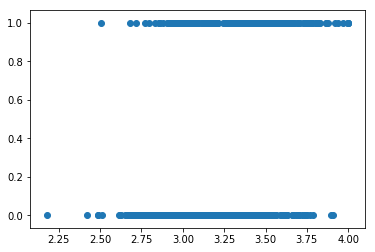

In [3]:
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

gpa column and the admit column do not have a clear linear relationship.

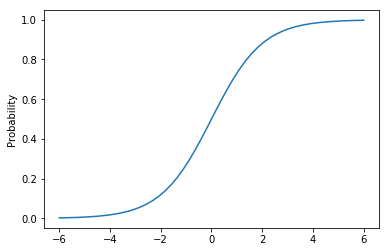

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

Training a logistic regression model in scikit-learn is similar to training a linear regression model, with the key difference that we use the LogisticRegression class instead of the LinearRegression class

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

logistic_model.fit(admissions[['gpa']], admissions['admit'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

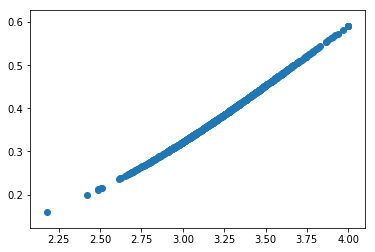

In [6]:
import matplotlib.pyplot as plt
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'],pred_probs[:,1])

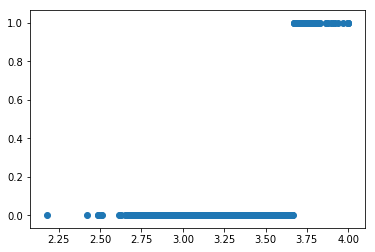

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[['gpa']])
plt.scatter(admissions['gpa'], fitted_labels)

 the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. 

#### evaluating binary classifiers

In [8]:
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
labels = model.predict(admissions[['gpa']])
admissions['predicted_label'] = labels
admissions.head()

,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [9]:
admissions['predicted_label'].value_counts()

0    598
1     46
Name: predicted_label, dtype: int64

In [10]:
admissions.corr()

,admit,gpa,gre,predicted_label
admit,1.000000,0.312187,0.494981,0.168677
gpa,0.312187,1.000000,-0.014440,0.525985
gre,0.494981,-0.014440,1.000000,-0.016733
predicted_label,0.168677,0.525985,-0.016733,1.000000


The admissions Dataframe now contains the predicted value for that row, in the predicted_label column, and the actual value for that row, in the admit column.
he simplest way to determine the effectiveness of a classification model is prediction accuracy.

In [11]:
admissions['actual_label'] = admissions['admit']
matches = (admissions['actual_label'] == admissions['predicted_label'])
correct_predictions = admissions[matches == True]


In [12]:
correct_predictions.shape

(416, 5)

In [13]:
accuracy = len(correct_predictions)/len(admissions)
accuracy

0.6459627329192547

It looks like the raw accuracy is around 64.6% which is better than randomly guessing the label

The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make.

To start, let's discuss the 4 different outcomes of a binary classification model:

True Positive - The model correctly predicted that the student would be admitted.

True Negative - The model correctly predicted that the student would be rejected.

False Positive - The model incorrectly predicted that the student would be admitted even though the student was actually rejected.


False Negative - The model incorrectly predicted that the student would be rejected even though the student was actually admitted.



In [14]:
true_positive_filter = admissions[(admissions['actual_label'] == 1) & (admissions['predicted_label'] == 1)]
true_positives = len(true_positive_filter)
true_negative_filter = admissions[(admissions['actual_label'] == 0) & (admissions['predicted_label'] == 0)]
true_negatives = len(true_negative_filter)


print(true_positives)
print(true_negatives)

31
385


Let's now look at a few measures that are much more insightful than simple accuracy. Let's start with sensitivity:

Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted: 

True Positives / (True Positive + False Negative)

In [15]:
# From the previous screen
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = admissions[(admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)]
false_negatives = len(false_negative_filter)

sensitivity = true_positives/(true_positives + false_negatives)
sensitivity

0.12704918032786885

Looks like the sensitivity of the model is around 12.7% and only about 1 in 8 students that should have been admitted were actually admitted. In the context of predicting student admissions, this probably isn't too bad of a thing. Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

Let's now learn about specificity:

Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:
True Negative / (True Negative + False Positives)

In [16]:
# From previous screens
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positive_filter = admissions[(admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)]
false_positives = len(false_positive_filter)

specificity = true_negatives / (false_positives + true_negatives)
specificity

0.9625

It looks like the specificity of the model is 96.25%. This means that the model is really good at knowing which applicants to reject. Since around only 7% of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.



### Multiclass Classification

The dataset we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, and how fast the car accelerates. Using this information we will predict the origin of the vehicle, either North America, Europe, or Asia.

In [21]:
cars = pd.read_csv("auto (1).csv")
unique_regions = cars['origin'].unique()
cars['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In many cases, like with this dataset, we'll have to create numeric representation of categorical values. For this dataset, categorical variables exist in three columns, cylinders, year, and origin

In [22]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)
dummy_years = pd.get_dummies(cars['year'], prefix='year')
cars = pd.concat([cars,dummy_years], axis=1)
cars = cars.drop(['year','cylinders'], axis=1)
cars

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,429.0,198.0,4341.0,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,454.0,220.0,4354.0,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,440.0,215.0,4312.0,8.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,455.0,225.0,4425.0,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,390.0,190.0,3850.0,8.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we explored binary classification, where there were only 2 possible categories, or classes. When we have 3 or more categories, we call the problem a multiclass classification problem. There are a few different methods of doing multiclass classification and in this dataset, we'll focus on the one-versus-all method.

The one-versus-all method is a technique where we choose a single category as the Positive case and group the rest of the categories as the False case. We're essentially splitting the problem into multiple binary classification problems. For each observation, the model will then output the probability of belonging to each category.



In [24]:
## splitting the dataset into train and train

shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

####  Training a multiclass logistic regression model

In the one-vs-all approach, we're essentially converting an n-class (in our case n is 3) classification problem into n binary classification problems. For our case, we'll need to train 3 models:

A model where all cars built in North America are considered Positive (1) and those built in Europe and Asia are considered Negative (0).   
A model where all cars built in Europe are considered Positive (1) and those built in North America and Asia are considered Negative (0).   
A model where all cars built in Asia are labeled Positive (1) and those built in North America and Europe are considered Negative (0).